In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Pre-Processing
#### This function is used to reduce the number of features that are used to train, we simply remove features that are reiterated in a different format

In [2]:
def trim_dataset(df, cols):
    removable_features = [0,4,8,12,14,15,19,20,23,27,31,33, 34,36,37,38,39]
    df = np.delete(df.values, removable_features, axis=1)
    cols = np.delete(cols, removable_features)
    df = pd.DataFrame(df, columns = cols)
    return df,cols

#### This function is used to load the information from the dataset into separate groups of features and labels that we will use to train our learning models on

In [3]:
def load_dataset(dataset = './datasets/high_diamond_ranked_10min.csv'):
    #Reading in of dataset
    df = pd.read_csv(dataset)
    cols = df.columns
    #Trimming down of features we don't need for our end result
    [df,cols] = trim_dataset(df, cols)
    array = df.to_numpy()
    x = array[:,1:]
    y = [row[0] for row in array]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle = False)
    return x_train, x_test, y_train, y_test, cols

#### Used to standardize our data as our MLP Classifier is sensitive to feature scaling, this can also help with the other learning models

In [4]:
def dataset_standardization(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

# Learning Models
#### Multi-Layered Perceptron

In [5]:
def MLP(x_train,x_test,y_train,y_test):
    clf = MLPClassifier(solver='sgd', alpha=0.00005,learning_rate='adaptive', learning_rate_init=0.05, hidden_layer_sizes=(2,13,2), random_state=1, max_iter = 5000)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    error = mean_squared_error(y_test, prediction)
    score = clf.score(x_test, y_test)
    return error, score, clf

#### Logistic Regression

In [6]:
def LR(x_train,x_test,y_train,y_test):
    logisticRegr = LogisticRegression(solver='liblinear',C=1.5)
    logisticRegr.fit(x_train, y_train)
    prediction = logisticRegr.predict(x_test)
    error = mean_squared_error(y_test, prediction)
    score = logisticRegr.score(x_test, y_test)
    return error, score, logisticRegr

#### Design Tree

In [7]:
def DT(x_train,x_test,y_train,y_test):
    clf = tree.DecisionTreeClassifier(splitter='best', max_depth=3)
    clf = clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    error = mean_squared_error(y_test, prediction)
    score = clf.score(x_test, y_test)
    return error, score, clf

# Main 

In [8]:
[x_train, x_test, y_train, y_test, info] = load_dataset()

In [9]:
[x_train, x_test] = dataset_standardization(x_train, x_test)

In [10]:
[MLP_error, MLP_accuracy, MLP_clf] = MLP(x_train,x_test,y_train,y_test)
print("Using a Multilayer Perceptron to learn results in",MLP_accuracy*100,"% accuracy of predictions")

Using a Multilayer Perceptron to learn results in 73.85290148448043 % accuracy of predictions


In [11]:
[LR_error, LR_accuracy, LR_clf] = LR(x_train,x_test,y_train,y_test)
print("Using Logistic Regression to learn results in",LR_accuracy*100,"% accuracy of predictions")

Using Logistic Regression to learn results in 73.3468286099865 % accuracy of predictions


In [12]:
[DT_error, DT_accuracy, DT_clf] = DT(x_train,x_test,y_train,y_test)
print("Using a Decision Tree to learn results in",DT_accuracy*100,"% accuracy of predictions")

Using a Decision Tree to learn results in 73.31309041835358 % accuracy of predictions


# Further Result Display

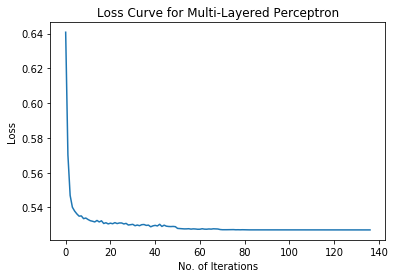

In [13]:
pl.plot(MLP_clf.loss_curve_)
pl.title("Loss Curve for Multi-Layered Perceptron")
pl.xlabel("No. of Iterations")
pl.ylabel("Loss")
pl.show(block=False)

In [14]:
print(confusion_matrix(y_test,MLP_clf.predict(x_test)))

[[1104  394]
 [ 381 1085]]


#### Testing the importance of certain features by having all other features the same except for the one being tested, in this case the importance of gold and experience difference. Negative values result in a loss for the blue team, the opposite is also true

In [15]:
CaseTesting = [[14,2,5,5,5,0,0,0,6.6,30,-300,-100,14,2,5,5,5,0,0,0,6.6,30]]
[x_train, CaseTesting] = dataset_standardization(x_train, CaseTesting)

In [16]:
MLP_clf.predict(CaseTesting)

array([0.])

#### Here, having more kills and assists while having lower deaths results in the blue team winning the game according to the model

In [17]:
CaseTesting = [[14,2,20,5,30,0,0,0,6.6,30,0,0,14,2,5,20,5,0,0,0,6.6,30]]
[x_train, CaseTesting] = dataset_standardization(x_train, CaseTesting)

In [18]:
MLP_clf.predict(CaseTesting)

array([1.])

#### Here, having more objectives achieved (i.e Dragon, Herald Captured and Towers Taken), results in the blue team winning the game according to the model

In [31]:
CaseTesting = [[14,2,5,5,5,1,1,1,6.6,30,0,0,14,2,5,5,5,0,0,0,6.6,30]]
[x_train, CaseTesting] = dataset_standardization(x_train, CaseTesting)

In [32]:
MLP_clf.predict(CaseTesting)

array([1.])